## IMPORTING DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
data = pd.read_csv(path)
data.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## PIPELINE

SIMPLIFICATION OF PROCEES TO DATA FOR PREDICTION IS DONE USING PIPELINES

IMPORTING ALL THE REQUIRED LIBRARY ALONG WITH PIPELINE

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
lm=LinearRegression()

We create a list of tuples first element of tuple contains the name of the $Estimator  model$ and second element of tuple contains $model constructor$

Then we input the list in pipeline constructor

In [4]:
Input=[('Scale',StandardScaler()),('Polynomial',PolynomialFeatures(degree=2)),('Mode',LinearRegression())]
Pipe=Pipeline(Input)

Pipe is a pipeline object

Now we can train the pipeline object by applying train methods to the object.

We have x as the predictor
        
        y as the target
        
        z as more than one feature as predictor(multiple regression)

In [10]:
x = data[['highway-mpg']]
y=  data["price"]
Z = data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]


In [6]:
Pipe.fit(Z,y)

Pipeline(memory=None,
         steps=[('Scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('Polynomial',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('Mode',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

We can also produce a prediction using pipeline module

In [7]:
yhat=Pipe.predict(Z)
yhat[0:5]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555,
       16136.29619164])

### Measures for In-sample Evaluation

A way to numerically determine how good a model fits on dataset.
Two important measures to determine the fit model are:-

    Mean squared Erorr(MSE)
    R-Squared(R^2)
    

#### 1) MSE
      We find the difference between actual value y and the predicted value yhat then sqaure the number.
      For example:
          Actual Vlaue-150
          Predicted Value -50
          Difference -100
          Square the no- 50^2
      We then find the mean  or average of all the errors by adding them and dividing by no of samples 

In [8]:
from sklearn.metrics import mean_squared_error

mean_squared_error function gets two inputs:-the actual value of the target and predicted value of the target variabe

In [13]:
lm.fit(x,y)
yhat=lm.predict(x)
mse=mean_squared_error(x,yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  204901256.0653103


#### 2) R^2 (R-squared)
        Also known as the coefficient of determination or R squared
        It is a measure to determine how close the data is to the fitted regression line
        So how close is our actual data estimated model?
        R^2 : the percentage of variation of the target variable (Y) that is explained by the linear model
        Think about comparing the regression model  to a simple modes like a mean of data points
        If the x is a good predictor  our model should perform much better than just the mean
        
        Coefficient of determination(R^2)
$$
R^2 = ( 1 -  ( MSE  of  regression  line  /  MSE of the average of the data ) ) 
$$

R^2 value using score method

In [14]:
lm.score(x,y)

0.4965911884339175

From the value we get that approximately 49.695% of the variation of the price is explained by this simple linear model 

R^2 value is usually between 0 and 1 , if its negative it can be due to your over fitting

## Prediction and decision making

To determine final best fit, we look at the combination of:

1. Do the predicted values make sense

2. Visualization

3. Numerical values for evaluation

4. Comparing Models


1. Do the predicted value make sense

We train the model for that

In [16]:
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Lets predict the price with 30 highway-mpg 

In [17]:
lm.predict(np.array(30.0).reshape(-1,1))

array([13771.3045085])

So the Price predicted is $13771.30 which makes a sense as a price of a car

#### To generate a sequence of values in a specified range

In [20]:
new_input=np.arange(1,101,1).reshape(-1,1)


We can use the output to predict the new values  

In [22]:
yhat=lm.predict(new_input)

### Visualising the new values

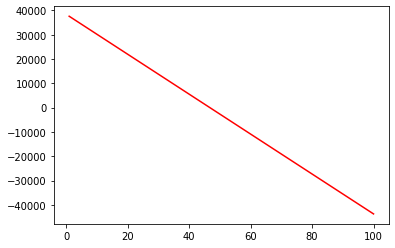

In [27]:
plt.plot(new_input,yhat,color="red")
plt.show()

2. Examining The visualised data

In [33]:
import seaborn as sns
%matplotlib inline

(0, 48296.34765664468)

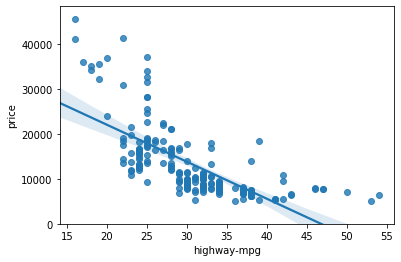

In [32]:
sns.regplot(x="highway-mpg", y="price", data=data)
plt.ylim(0,)

PREDICTION:- The data trends down as the dependent variable increases

Plot also shows a non-linear behaviour

### Simple Linear Regression model (SLR) vs Multiple Linear Regression model (MLR)
Usually, the more variables you have, the better your model is at predicting, but this is not always true. Sometimes you may not have enough data, you may run into numerical problems, or many of the variables may not be useful and or even act as noise. As a result, you should always check the MSE and R^2.

So to be able to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.

MSEThe MSE of SLR is 3.16x10^7 while MLR has an MSE of 1.2 x10^7. 

The MSE of MLR is much smaller.

R-squared: In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR.

The R-squared for the SLR (0.497) is very small compared to the R-squared for the MLR (0.809).

This R-squared in combination with the MSE show that MLR seems like the better model fit in this case, compared to SLR.

Simple Linear Model (SLR) vs Polynomial Fit
MSE: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.

R-squared: The R-squared for the Polyfit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.

Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting Price with Highway-mpg as a predictor variable.

Multiple Linear Regression (MLR) vs Polynomial Fit

MSE: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.

R-squared: The R-squared for the MLR is also much larger than for the Polynomial Fit.